In [4]:
import pandas as pd
import numpy as np
import warnings


In [5]:
warnings.filterwarnings('ignore')


In [16]:
#get data

columns_name = ['user_id' , 'item_id' , 'rating' , "timestamp"]
df = pd.read_csv("ml-100k/u.data" , sep = '\t' , names = columns_name) #as values are seperated by tab
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [17]:
df.shape

(100000, 4)

In [21]:
print(df['user_id'].nunique()) #943 unique players
print(df['item_id'].nunique()) #1682 unique movies

943
1682


In [26]:
movies_title = pd.read_csv('ml-100k/u.item' , sep = "\|" , header = None)
movies_title.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
movies_titles = movies_title[[0,1]]
movies_titles.columns = ['item_id' , 'title']
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [36]:
df = pd.merge(df , movies_titles , on = "item_id")
df

,user_id,item_id,rating,timestamp,title_x,title_y,title_x,title_y,title
0,196,242,3,881250949,Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996)
1,63,242,3,875747190,Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996)
2,226,242,5,883888671,Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996)
3,154,242,3,879138235,Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996)
4,306,242,5,876503793,Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996)
...,...,...,...,...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962),Mamma Roma (1962),Mamma Roma (1962),Mamma Roma (1962),Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)","Eighth Day, The (1996)","Eighth Day, The (1996)","Eighth Day, The (1996)","Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996),Girls Town (1996),Girls Town (1996),Girls Town (1996),Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...","Silence of the Palace, The (Saimt el Qusur) (1...","Silence of the Palace, The (Saimt el Qusur) (1...","Silence of the Palace, The (Saimt el Qusur) (1...","Silence of the Palace, The (Saimt el Qusur) (1..."


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [41]:
df.groupby('title').mean()['rating'].sort_values(ascending = False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [44]:
df.groupby('title').count()['rating'].sort_values(ascending = False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
� k�ldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [47]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])
ratings['num_of_ratings'] = df.groupby('title').count()['rating'].sort_values(ascending = False)

In [49]:
ratings #average rating and num of ratingz

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [50]:
ratings.sort_values(by = 'rating' , ascending=False)

,rating,num_of_ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


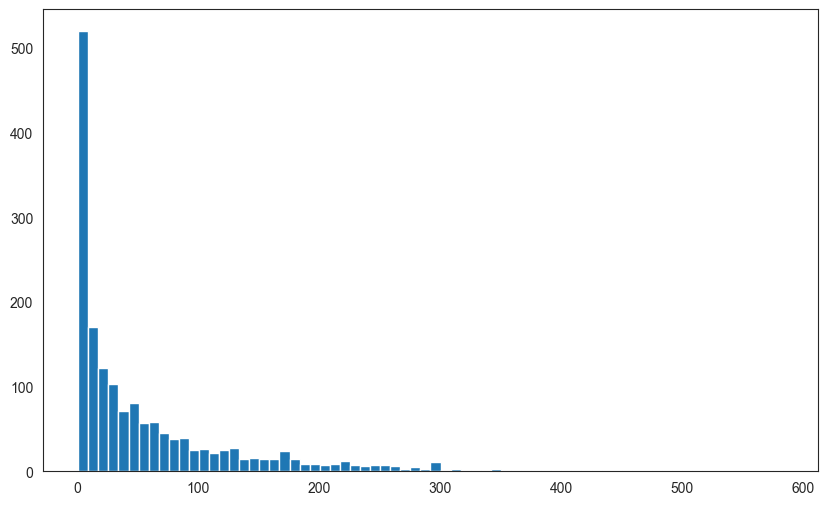

In [54]:
plt.figure(figsize = (10,6))
plt.hist(ratings['num_of_ratings'] , bins = 70)
plt.show()

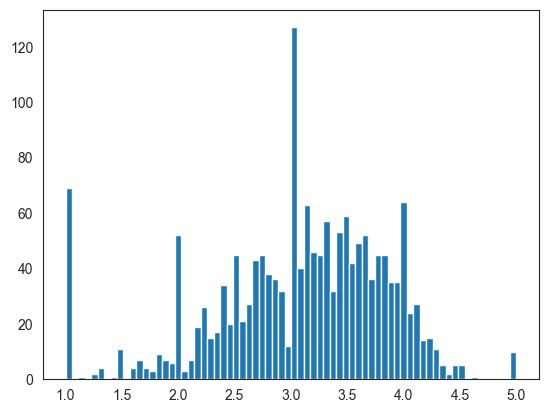

In [55]:
#the movies which have only one rating are not that relevant

plt.hist(ratings['rating'] , bins = 70)
plt.show()

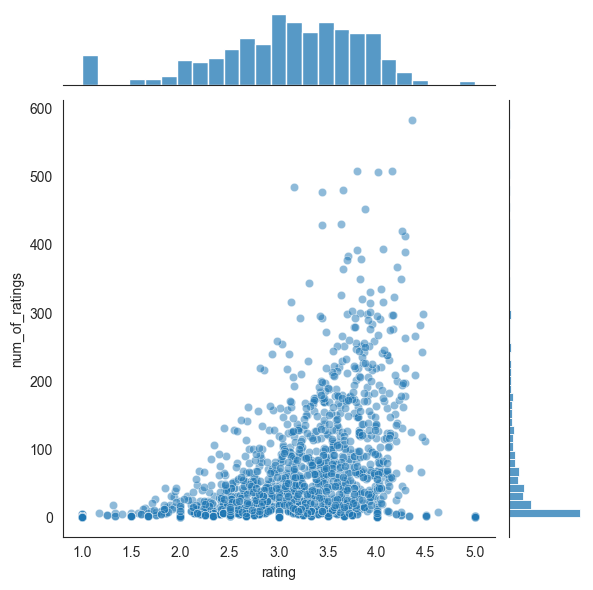

In [62]:
sns.jointplot(x='rating' , y = 'num_of_ratings' , data = ratings , alpha = 0.5)
plt.show()

In [63]:
df.head()

,user_id,item_id,rating,timestamp,title_x,title_y,title_x,title_y,title
0,196,242,3,881250949,Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996)
1,63,242,3,875747190,Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996)
2,226,242,5,883888671,Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996)
3,154,242,3,879138235,Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996)
4,306,242,5,876503793,Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996),Kolya (1996)


In [64]:
movie_matrix = df.pivot_table(index = 'user_id' , columns = 'title' , values = 'rating')

In [65]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [66]:
ratings.sort_values('num_of_ratings' , ascending = False)

,rating,num_of_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [69]:
starwars_user_ratings = movie_matrix['Star Wars (1977)']
starwars_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [74]:
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)

similar_to_starwars.sort_values(ascending = False)

title
Hollow Reed (1996)                        1.0
Commandments (1997)                       1.0
Cosi (1996)                               1.0
No Escape (1994)                          1.0
Stripes (1981)                            1.0
                                         ... 
Roseanna's Grave (For Roseanna) (1997)   -1.0
For Ever Mozart (1996)                   -1.0
American Dream (1990)                    -1.0
Frankie Starlight (1995)                 -1.0
Fille seule, La (A Single Girl) (1995)   -1.0
Length: 1410, dtype: float64

In [76]:
corr_starwars = pd.DataFrame(similar_to_starwars , columns = ['Correlation'])
corr_starwars.dropna(inplace = True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [78]:
corr_starwars.sort_values(('Correlation') , ascending = False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [100]:
#corr_starwars = corr_starwars.join(ratings['num_of_ratings'])
suggested = corr_starwars[corr_starwars['num_of_ratings']>100].sort_values('Correlation', ascending = False).head()
suggested

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [101]:
def predict_movies(movie_name):
    movies_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movies_user_rating)
    corr_movie = pd.DataFrame(similar_to_movie , columns = ['Correlation'])
    corr_mvoie.dropna(inplace = True)
    #corr_starwars.head()
    corr_movies = corr_movie.join(ratings['num_of_ratings'])
    suggested = corr_movie[corr_movie['num_of_ratings']>100].sort_values('Correlation', ascending = False).head()
    
    return suggested


    
    

In [102]:
predict_movies("Titanic (1997)")

NameError: name 'movies_user_rating' is not defined